
Ejercicio 1. Defina las siguientes matrices.

$$\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 ,3 \\
   -1 ,7
   \end{bmatrix}
\end{equation*}$$$$\begin{equation*}
 B =
  \begin{bmatrix}
   5 ,2 \\
   1 ,2
   \end{bmatrix}
\end{equation*}$$
y la matrix identidad

$$\begin{equation*}
 I = 
   \begin{bmatrix}
   1 ,0 \\
   0 ,1
   \end{bmatrix}
\end{equation*}$$

Calcule el resultado de $2*I+3*A+A@B$.




In [1]:

import numpy as np
import scipy.linalg as la
import pandas as pd
from numpy.linalg import matrix_power as mpow
from numpy import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#DEFINIMOS NUESTRAS MATRICES
A=np.array([[1,3],[-1,7]])
B=np.array([[5,2],[1,2]])
I=np.eye(2,dtype=int)
#CONFIRMAMOS QUE SE HAYAN DEFINIDO CORRECTAMENTE
#print(A)
#print(B)
#print(I)
#HACEMOS LA OPERACION NECESARIA
print(2*I+3*A+A@B)

[[13 17]
 [-1 35]]



Ejercicio 2. Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación$$
\det(M - \lambda I) = 0
$$Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como$$
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
$$y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

$$
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
$$
El Teorema de Cayley-Hamilton nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico$$
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
$$y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$.

Demuestre esto para cualquier matriz M (2x2), ($\det(M) \neq 0$).


In [3]:
#DEMOSTRAREMOS EL TEOREMA DE CALEY HAMILTON ITERANDO CREANDO 9999 MATRICES (O MAS) DE MANERA EL POLINOMIO CARACTERISTICO SE EVALUE EN CADA UNA DE LAS MATRICES QUE CREAMOS
#USANDO LA FUNCION RANDOM IMPORTADA DE NUMPY
i=1
I=np.array([[1,0],[0,1]])
while i<9999:
  M=random.rand(2,2)  
  i=i+1
  P=la.det(M)*I-np.trace(M)*M+M@M
  #print(M,P,i)
  if P[0,0]>0.001 or P[1,0]>0.001 or P[1,1]>0.001 or P[0,1]>0.001 :
    break 
  elif i==9999:
    print("Teorema de Cayley Hamilton comprobado")
 #AUNQUE ESTA NO ES UNA DEMOSTRACION FORMAL, NOS AYUDA Y NO BRINDA LA MANERA DE COPROBAR EL TEOREMA Y CONVENCERNOS CON METODOS DE ITERACION DE QUE SI SE CUMPLE   


Teorema de Cayley Hamilton comprobado



Ejercicio 3:

Resuelva el sistema de ecuaciones.

$$\begin{eqnarray*}
x - 3 y + z =  1 \\ \nonumber
3 x - 4y + z  =  5 \\ \nonumber
2 y - z =  0 \\ \nonumber
\end{eqnarray*}$$
de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

In [4]:
#DEFINIMOS LAS 3 OPERACIONES QUE REALIZAREMOS ALA MATRIZ PARA APLICAR LA ELIMINACION GAUSSIANA
#INTERCAMBIO DE RENGLONES
def switch_rows(A,i,j):
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A
#MULTIPLICACION DE UN RENGLON POR UN ESCALAR "K"
def scale_row(A,k,i):
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# SUMAR "K" VECES EL RENGLON J AL RENGLON I
def add_row(A,k,i,j):
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A


In [5]:
A=np.array([[1,-3,1,1],[3,-4,1,5],[0,2,-1,0]])  
#EN CADA PASO IMPRIMIMOS A PARA IR VIENDO COMO DE DESARROLLA NUESTRA ELIMINACION GAUSSIANA     
A=scale_row(A,1/3,1)
A=add_row(A,-1,1,0)
A=scale_row(A,3/5,1)
A=add_row(A,-2,2,1)
A=add_row(A,-2,1,2)
#ARREGLAMOS UN ERROR DE PUNTO FLOTANTE
A[1,2]=0
A=add_row(A,5,0,2)
#ARREGLAMOS OTRO ERROR DE PUNTO FLOTANTE
A[0,2]=0
A=scale_row(A,-5,2)
A=add_row(A,3,0,1)
print(A)
#OBSERVAMOS QUE X=3,Y=2,Z=4




[[1. 0. 0. 3.]
 [0. 1. 0. 2.]
 [0. 0. 1. 4.]]



Ejercicio 4:

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre Eigenvalores y Eigenvectores)

$$\begin{equation*}
B_1 = \begin{bmatrix}
2 ,0 ,0 \\
0 ,3 ,4 \\
0 ,4 ,9 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_2 = \begin{bmatrix}
0  ,1 ,0 \\
0  ,0 ,1 \\
1  ,0 ,0 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_3 = \begin{bmatrix}
2 ,0 ,0 ,0\\
1 ,2 ,0 ,0 \\
0 ,1 ,3 ,0 \\
0 ,0 ,1 ,3 \\
\end{bmatrix}
\end{equation*}$$
Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.

In [6]:
#APLICAMOS scypy.linalg.eig()
#definimos nuestras matrices
B1=np.array([[2,0,0],[0,3,4],[0,4,9]])
B2=np.array([[0,1,0],[0,0,1],[1,0,0]])
B3=np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print("Eingenvalores y eigenvectores de ",B1)
eigvals, eigvecs = la.eig(B1)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)
#VEMOS QUE LOS EINGENVALORES SON LOS MISMOS QUE EN EL ARTICULO DE WIKIPEDIA, Y LOS EINGEVECTORES NO SON IGUALES A LOS QUE SE MUESTRAN EN EL ARTICULO, PERO SON EQUIVALENTES, YA QUE AL MULTIPLICAR POR UNA CONSTANTE K≈2.23 SON IGUALES.

Eingenvalores y eigenvectores de  [[2 0 0]
 [0 3 4]
 [0 4 9]]
Eigenvalores: [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores: [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [7]:
B2=np.array([[0,1,0],[0,0,1],[1,0,0]])
print("Eingenvalores y eigenvectores de ",B2)
eigvals, eigvecs = la.eig(B2)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)
#OBTENEMOS ALGUNOS EINGEVALORES Y EINGEVECTORES COMPLEJOS, AL IGUAL QUE EN EL ARTICULO DE WIKIPEDIA

Eingenvalores y eigenvectores de  [[0 1 0]
 [0 0 1]
 [1 0 0]]
Eigenvalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores: [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]


In [8]:
B3=np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print("Eingenvalores y eigenvectores de ",B3)
eigvals, eigvecs = la.eig(B3)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)
#LOS EINGEVALORES SON 2 Y 3 CON MULTIPLICIDAD 2, AL IGUAL QUE EN EL ARTICULO DE WIKIPEDIA, PERO LOS EINGEVECTORES SON DIFERETES, PERO PODRIAN SER EQUIVALENTES

Eingenvalores y eigenvectores de  [[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]
Eigenvalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]


Ejercicio 5. Se tienen los siguientes 8 puntos:

$$\begin{eqnarray*} 
(x ,y) \\
(0.0 ,0.0) \\ 
(0.5 ,0.47942) \\ 
(1.0 ,0.84147) \\
(1.5 ,0.99749) \\
(2.0 ,0.90930) \\
(2.5 ,0.59847) \\
(3.0 ,0.14112) \\
(3.5 ,-0.35078) \\
\end{eqnarray*}$$
Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos.

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


Text(0.5, 1.0, 'Interpolacion de 8 puntos con un polinomio de septiomo grado (linea punteada)')

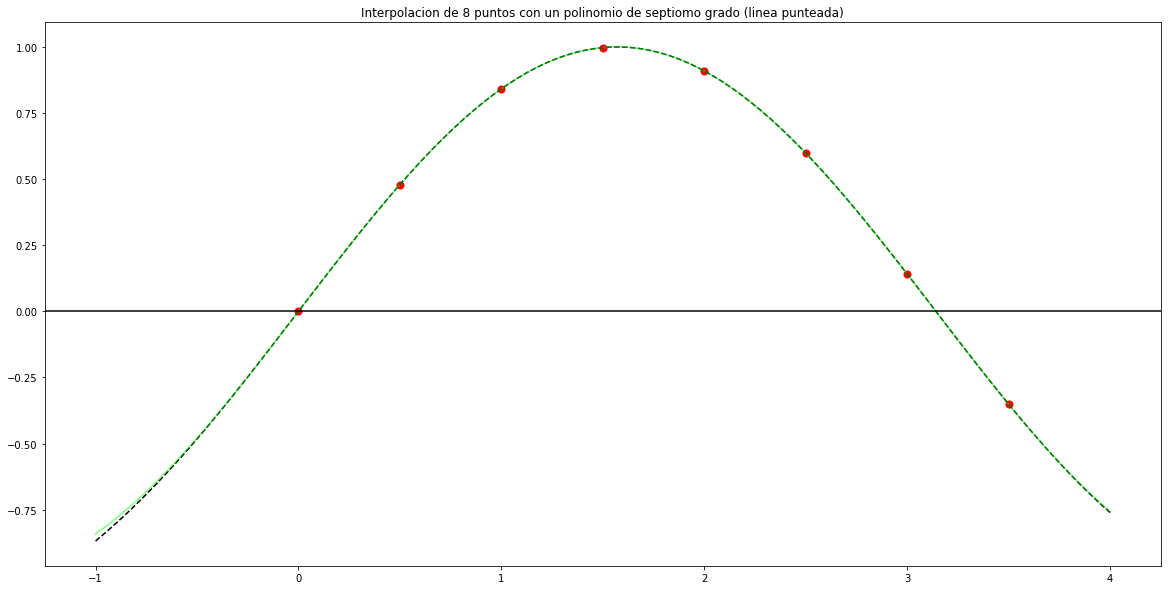

In [9]:
#CONSTRUIMOS LA MATRIZ DE VANDERMONDE
x=np.array([0,0.5,1,1.5,2,2.5,3,3.5])
X=np.column_stack([[1,1,1,1,1,1,1,1],x,x**2,x**3,x**4,x**5,x**6,x**7])
#VERIFICAMOS LA MATRIZ
#print(X)
#DEFINIMOS LA MARTRIZ DE LAS ORDENADAS y cambiamos de fila a columna su acomodo 
Y=np.array([0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)
#print(Y)
#RESOLVEMOS PARA XA=Y
A=la.solve(X,Y)
print(A)
#GRAFICAMOS NUESTRA INTERPOLACION Y LA TRASPONEMOS CON LOS PUNTOS DADOS INICIALMENTE
XI=np.linspace(-1,4,100)
yi=A[0]+A[1]*XI+A[2]*XI**2+A[3]*XI**3+A[4]*XI**4+A[5]*XI**5+A[6]*XI**6+A[7]*XI**7
plt.figure(figsize=(20,10))
plt.plot(XI,yi,"black",linestyle="--")
plt.scatter(x.reshape(8,1),Y,s=50,c="red")
plt.plot(XI,np.sin(XI),color="lime",alpha=0.5)
plt.axhline(0,color="black")
plt.title("Interpolacion de 8 puntos con un polinomio de septiomo grado (linea punteada)")
#podemos ver como el polinomio que obtuvimos es bastante bueno ya que pasa de manera suave por todos los puntos, la trasponerse con la grafica del sen(x) notamos que el polinomio difiere de este entre mas se alejen del rango de puntos que interpolamos.


Ejercicio 6. Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

NOTA: Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones.


In [10]:
#Para empezar esta actividad, realizamos los mismos pasos que en la actividad 3 para crear nuestro DataFrame con la informaciòn de la estaciòn meteorologìca.
#Creamos nuestro DataFrame inicial leyendo el archivo de datos desde el repositoria de github.
url = "https://raw.githubusercontent.com/OscarAngul0/FisicaComputacional1/master/Actividad1/25015.txt"
#CREAMOS NUESTRO DATA FRAME
my_col = ["Fecha","Precip","Evap","T_Max","T_min"]
df_data = pd.read_csv(url, names=my_col, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")
#url es la direccion del archivo, names nos da nombres a las columnas, enncoding le dice a python que el archivo tienes caracteres en español. sep es el formato de separacion de datos. header son comentarios al principio del archivo
#verificamos que el dataframe se haya creado correctamente
#print (df_data.head(), df_data.tail())
str_Nulo = 'Nulo'
df_data1 = df_data.replace(to_replace=str_Nulo, value='', regex=True)
#convertimos la informacion a numeros flotantes
cols1 = ['Precip', 'Evap', 'T_Max', 'T_min']
for cols in cols1:
  df_data1[cols] = pd.to_numeric(df_data1[cols], errors='coerce')
  #verificamos cuantos datos nulos hay
df_data1.isnull().sum() 
#vemos que casi no faltan datos en relacion al numero de dias donde tenemos mediciones
#hacemos estadistica
df_data1.describe()
#trabajamos la columa de las fechas
df_data2=df_data1.copy()
df_data2["Fecha"] = pd.to_datetime(df_data2["Fecha"], dayfirst=True)
 #print (df_data2.head())
df_data2.dtypes
#Agregamos 2 nuevas columnas poara denotar el año y el mes, esto se hace para facilitar el filtrado de informacion +adelante
df_data2["Año"]=df_data2["Fecha"].dt.year
df_data2["Mes"]=df_data2["Fecha"].dt.month
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes en unavariable de tipo caracter
df_data2.drop('Mes', axis=1, inplace=True) #inplace=true hace que los cambios en esa columnna se hagan directamente sobre el dataframe original.
df_data2['Mes'] = df_data2['Fecha'].dt.strftime('%b')
print (df_data2.info())
print (df_data2.head(), df_data2.tail())
print (df_data2.dtypes)
#Nos aseguramos que el data frame, contenga los datos del tipo correcto
print (df_data2.shape)
print (df_data2.describe)
print (df_data2.isnull().sum() )
#Obtenemos la informacion general de nuestro DataFrame, asi completando lo necesario para comenzar con el analisis exploratorio de datos 
#HACEMOS NUESTRA SERIE DE TIEMPO
df_datas=df_data2.copy
df_datas=df_data2.set_index("Fecha")
#confirmamos 
df_datas.info()
#seleccionamos nuestros conjuntos de datos
df_60 = df_datas[(df_datas["Año"]>=1960) & (df_datas["Año"]<1990)]
df_90=df_datas[(df_datas["Año"]>=1990)&(df_datas["Año"]<2020)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21266 entries, 0 to 21265
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   21266 non-null  datetime64[ns]
 1   Precip  21237 non-null  float64       
 2   Evap    20900 non-null  float64       
 3   T_Max   21190 non-null  float64       
 4   T_min   21179 non-null  float64       
 5   Año     21266 non-null  int64         
 6   Mes     21266 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB
None
       Fecha  Precip  Evap  T_Max  T_min   Año  Mes
0 1961-01-01     0.0   2.9   22.0   10.5  1961  Jan
1 1961-01-02     0.0   2.7   25.0    9.0  1961  Jan
2 1961-01-03     0.0   3.7   29.0   10.0  1961  Jan
3 1961-01-04     0.0   2.5   22.0   13.0  1961  Jan
4 1961-01-05     0.0   1.1   24.0   14.0  1961  Jan            Fecha  Precip  Evap  T_Max  T_min   Año  Mes
21261 2019-04-26     0.0   6.9   36.0   16

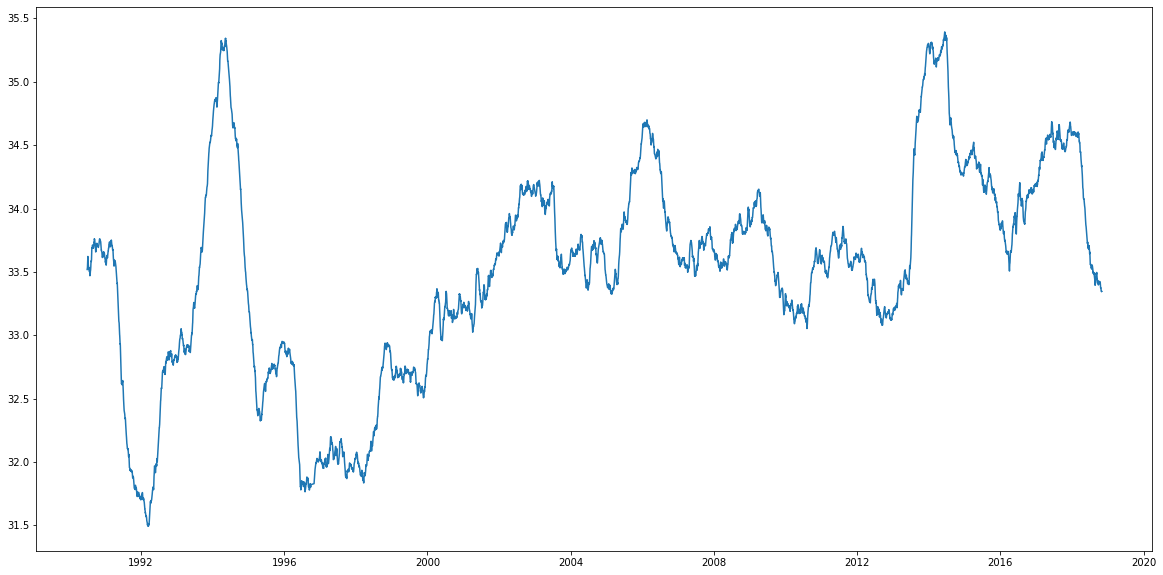

In [11]:
#DESCOMPONEMOS NUESTRA SERIE DE TIEMPO DE T_Max 
#hacemos datas frames especiales
ts_tmax=df_90["T_Max"]
#ts_tmax.tail()
#hacemos la descomposición de la serie de tiempo, obs=tendencia+estacionalidad+residuo
# Método de descomposición usando la biblioteca statsmodels.tsa
decomposition = sm.tsa.seasonal_decompose(ts_tmax.interpolate(), model='additive', freq=365)
Tmaxtrend=decomposition.trend
plt.figure(figsize=(20,10))
plt.plot(Tmaxtrend, label='Tendencia')



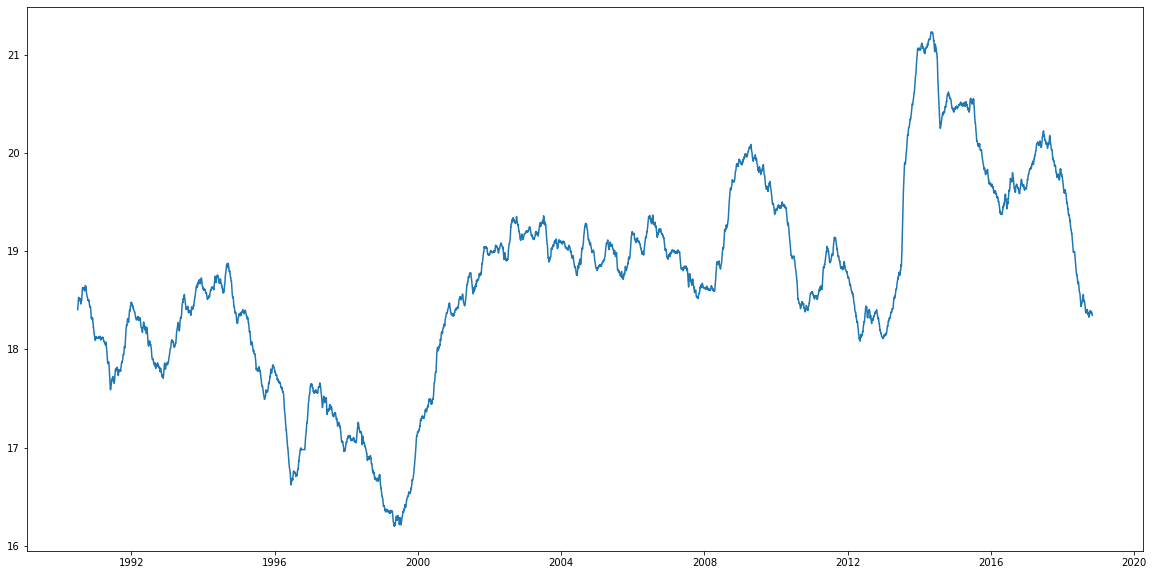

In [12]:
#DESCOMPONEMOS NUESTRA SERIE DE TIEMPO DE T_Min
#hacemos datas frames especiales
ts_tmin=df_90["T_min"]
#hacemos la descomposición de la serie de tiempo, obs=tendencia+estacionalidad+residuo
# Método de descomposición usando la biblioteca statsmodels.tsa
decomposition = sm.tsa.seasonal_decompose(ts_tmin.interpolate(), model='additive', freq=365)
Tmintrend=decomposition.trend
plt.figure(figsize=(20,10))
plt.plot(Tmintrend, label='Tendencia')

In [24]:
#HACEMOS REGRESION LINEAL PARA LA TEMPERATURA MAXIMA
Tmaxtrend = Tmaxtrend[~np.isnan(Tmaxtrend)]
#print(Tmaxtrend)
N=10310
x = np.arange(0,N)
# Construimos la matriz de Vandermonde
X = np.column_stack([np.ones(N),x])
#resolvemos para obtener los coeficientes
a = la.solve(X.T @ X, X.T @ Tmaxtrend)
print(a)


[3.27142041e+01 1.53478915e-04]


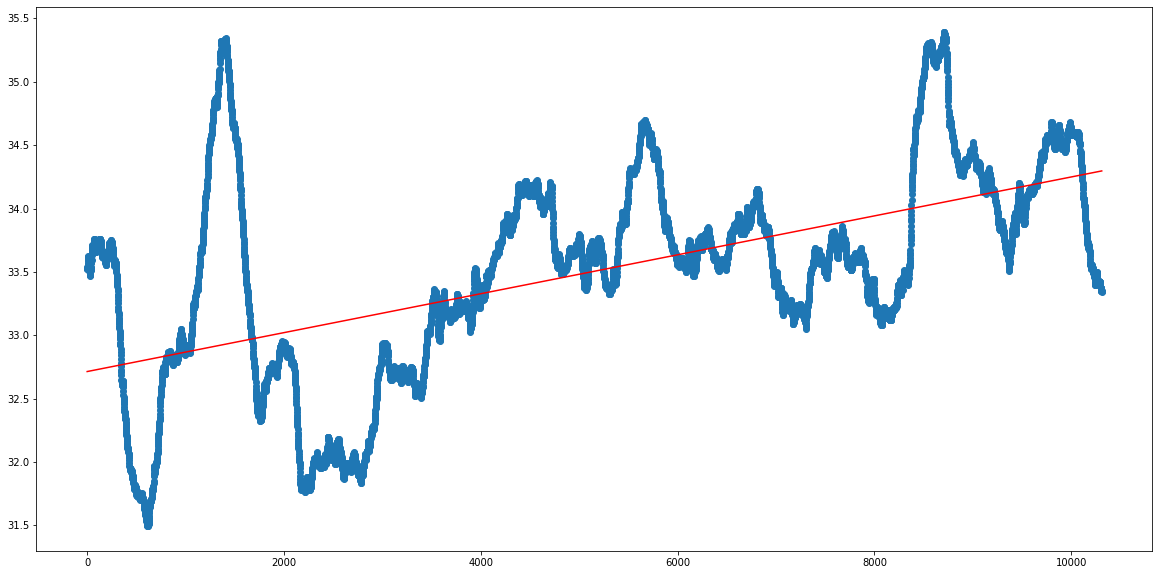

In [25]:
#AHORA QUE YA OBTUVIMOS NUESTROS COEFICIENTES, GRAFICAMOS LA REGRESION LINEAL JUNTO A LOS DATOS ORIGINALES
#PARA EVITAR EL PROBLEMA DE QUE NUESTRA SERIE DE TIEMPO TIENE COMO INDICE LA FECHA EN FORMATO DATETIME, GRAFICAMOS POR DISPERSION USANDO COMO COORDENADA X EL INDICE SUCESIVO DE CADA MEDICION DE TEMPERATURA
xs=np.linspace(0,N,N)
ys=a[0]+a[1]*xs
plt.figure(figsize=(20,10))
plt.scatter(xs,Tmaxtrend, label='Tendencia')
plt.plot(xs,ys,"red")
#podemos ver que la pendietne es pequeña pero es positiva, a lo largo del tiempo se hace notar, por lo que podemos afirmar es que la tendencia es que la temperatura maxima AUMETNTE

In [26]:
#HACEMOS REGRESION LINEAL PARA LA TEMPERATURA MINIMA
Tmintrend = Tmintrend[~np.isnan(Tmintrend)]
#print(Tmaxtrend)
N_2=10310
x_2 = np.arange(0,N_2)
# Construimos la matriz de Vandermonde
X_2 = np.column_stack([np.ones(N_2),x_2])
#resolvemos para obtener los coeficientes
b = la.solve(X_2.T @ X_2, X_2.T @ Tmintrend)
print(b)


[1.75253260e+01 2.26244829e-04]


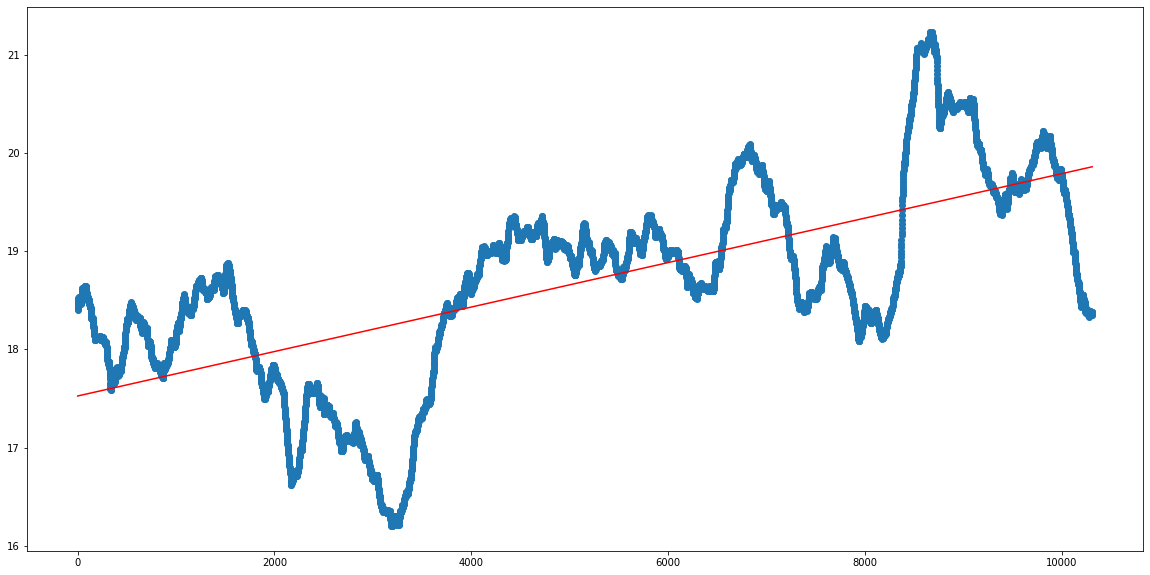

In [27]:
#AHORA QUE YA OBTUVIMOS NUESTROS COEFICIENTES, GRAFICAMOS LA REGRESION LINEAL JUNTO A LOS DATOS ORIGINALES
#PARA EVITAR EL PROBLEMA DE QUE NUESTRA SERIE DE TIEMPO TIENE COMO INDICE LA FECHA EN FORMATO DATETIME, GRAFICAMOS POR DISPERSION USANDO COMO COORDENADA X EL INDICE SUCESIVO DE CADA MEDICION DE TEMPERATURA
xi=np.linspace(0,N_2,N_2)
yi=b[0]+b[1]*xi
plt.figure(figsize=(20,10))
plt.scatter(xi,Tmintrend, label='Tendencia')
plt.plot(xi,yi,"red")
#podemos notar claramente como la pemndiente es positiva, por lo tanto La temperatura minima cada vez es mas alta igualmente.